<a href="https://colab.research.google.com/github/dinesh052003/IBM-APPLIED-DATASCIENCE/blob/main/ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
df=pd.read_csv('/content/penguins_size.csv')

In [91]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


UNIVARIENT ANALYSIS

<Axes: xlabel='culmen_length_mm', ylabel='Count'>

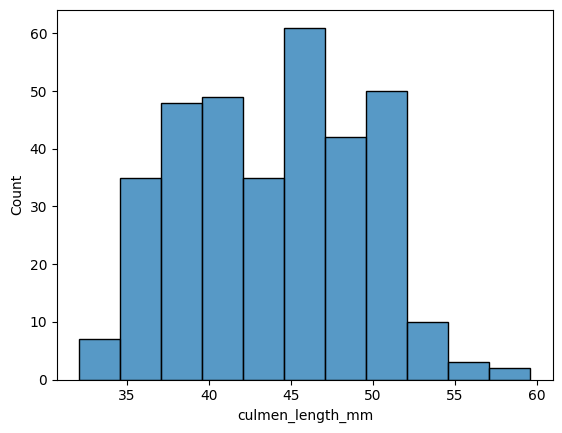

In [92]:
sns.histplot(df['culmen_length_mm'])

<Axes: xlabel='body_mass_g', ylabel='count'>

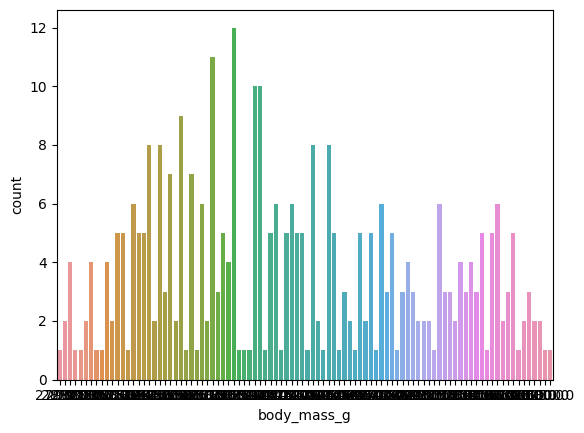

In [93]:
sns.countplot(x=df['body_mass_g'])

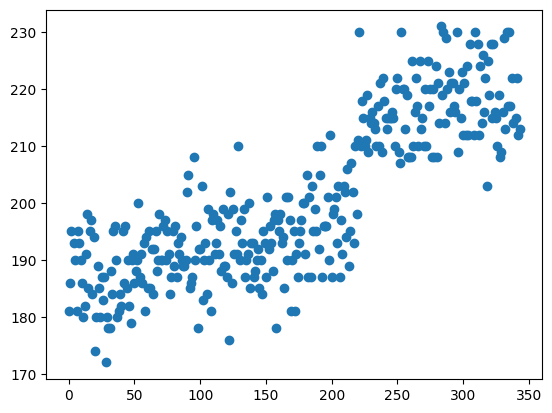

In [94]:
plt.scatter(df.index,df['flipper_length_mm'])
plt.show()

BI-VARIATE ANALYSIS

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

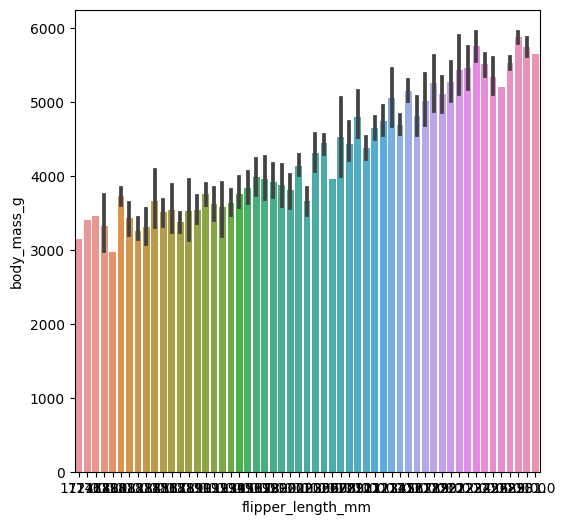

In [95]:
plt.figure(figsize=(6,6))
sns.barplot(x=df['flipper_length_mm'],y=df['body_mass_g'])

<Axes: xlabel='island', ylabel='culmen_length_mm'>

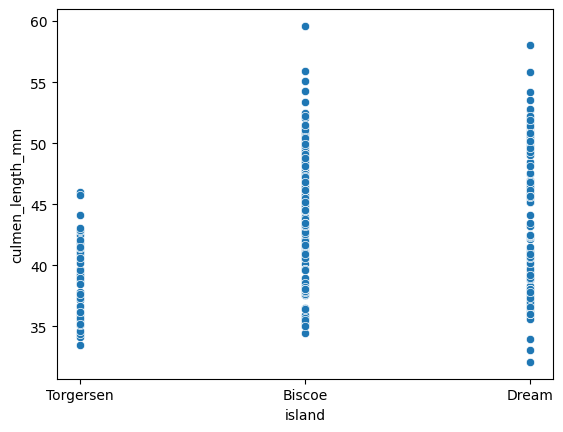

In [96]:
sns.scatterplot(x=df['island'],y=df['culmen_length_mm'])

<Axes: xlabel='culmen_length_mm', ylabel='count'>

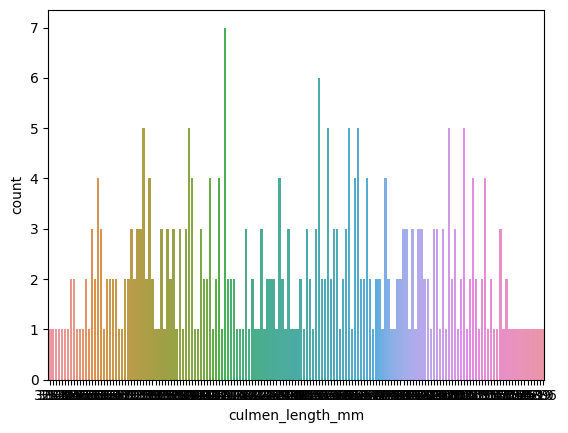

In [97]:
sns.countplot(x=df['culmen_length_mm'])

MULTIVARIATE ANALYSIS

<ipython-input-98-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

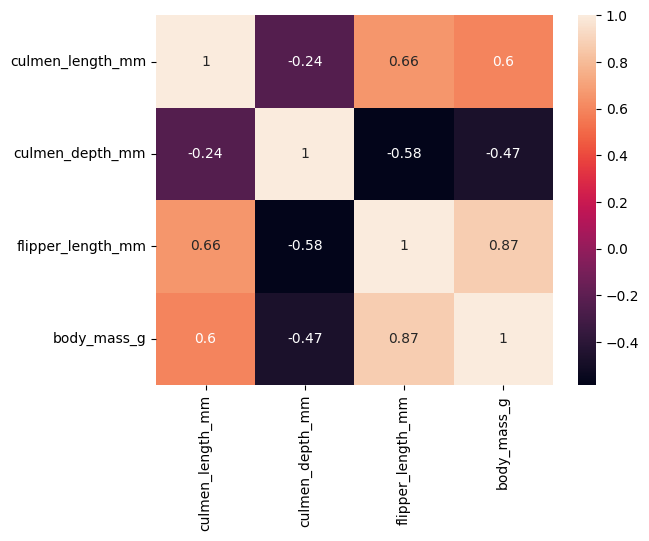

In [98]:
sns.heatmap(df.corr(),annot=True)

4.DESCRIPTIVE STATISTICS

In [99]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


5.MISSING VALUES

In [100]:
#checking for missing values
print(df.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [101]:
df.dropna(inplace=True)
df.dropna(axis=1,inplace=True)

6.FIND THE OUTLIER AND REPLACE THEM OUTLIERS

In [102]:
import numpy as np
# generate some random data
data = np.random.normal(loc=50, scale=10, size=100)
# define a function to detect and replace outliers using IQR method
def replace_outliers_IQR(data):
    # calculate the quartiles and IQR
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1

    # detect outliers using IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]

    # replace outliers with the median value
    data[outliers] = np.median(data)

    return data

# call the function and print the results
print("Original data:", data)
data_replaced = replace_outliers_IQR(data)
print("Data with replaced outliers:", data_replaced)

Original data: [42.24865013 61.78543288 53.05779137 50.04887188 48.51003819 60.48696903
 53.50731824 57.34794009 40.29249399 49.36661612 54.67218432 47.6565027
 41.62553638 38.85903017 58.1731137  51.25582729 65.8543565  35.57879105
 45.23413828 40.59002421 51.2251877  37.17409128 39.99875599 35.87885167
 59.89536246 50.84367712 52.22498196 49.64630221 46.85081072 47.65734192
 51.45269929 54.10148943 40.30636353 60.85083655 64.16230474 31.42110965
 53.76460551 31.71925295 51.35956965 37.23114412 39.43756172 43.43187468
 69.75623037 55.13282277 65.77150729 35.75008131 56.47739435 63.37926667
 50.56503961 39.91965307 57.37912633 44.25425742 42.3960131  48.75769215
 47.46300711 41.71941932 52.32592949 75.42055965 66.06176693 50.72371986
 68.48180596 54.43815059 46.00812762 58.91410641 58.85747684 36.32574754
 31.31652499 45.96127912 42.17333383 26.70294532 48.34069931 70.24928058
 62.76937614 46.80776672 31.53491721 31.0784883  57.85273309 51.92545353
 43.56720451 48.15466821 44.82675174 

7.CHECK FOR CATEGORICAL COLOUMN

In [103]:
df_categorical=df[['flipper_length_mm','body_mass_g','culmen_length_mm','culmen_depth_mm']]

In [104]:
df_categorical.head()

,flipper_length_mm,body_mass_g,culmen_length_mm,culmen_depth_mm
0,181.0,3750.0,39.1,18.7
1,186.0,3800.0,39.5,17.4
2,195.0,3250.0,40.3,18.0
4,193.0,3450.0,36.7,19.3
5,190.0,3650.0,39.3,20.6


In [105]:
print(df['body_mass_g'].unique())

[3750. 3800. 3250. 3450. 3650. 3625. 4675. 3200. 4400. 3700. 4500. 3325.
 4200. 3400. 3600. 3950. 3550. 3150. 3900. 3300. 4150. 4650. 3100. 3000.
 4600. 3425. 3500. 4300. 4050. 2900. 2850. 3350. 4100. 3050. 4450. 4250.
 4000. 4700. 4350. 3725. 4725. 3075. 2925. 3175. 4775. 3825. 4275. 4075.
 3775. 3875. 3275. 4475. 3975. 3475. 3525. 3575. 4550. 3850. 4800. 2700.
 3675. 5700. 5400. 5200. 5150. 5550. 5850. 6300. 5350. 5000. 5050. 5100.
 5650. 5250. 6050. 4950. 4750. 4900. 5300. 4850. 5800. 6000. 5950. 4625.
 5450. 5600. 4875. 4925. 4975. 5500. 4575. 4375. 5750.]


In [106]:
# perform one-hot encoding
encoded_df = pd.get_dummies(df)

# print the encoded dataframe
print(encoded_df)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0

In [107]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


ENCODE THE CATEGORICAL VARIABLES

In [108]:
from sklearn.preprocessing import LabelEncoder
el=LabelEncoder()
el2=LabelEncoder()

In [109]:
df['island']=el.fit_transform(df['island'])
df['culmen_length_mm']=el.fit_transform(df['culmen_length_mm'])
df['species']=el.fit_transform(df['species'])
df['culmen_depth_mm']=el.fit_transform(df['culmen_depth_mm'])
df['flipper_length_mm']=el.fit_transform(df['flipper_length_mm'])
df['body_mass_g']=el2.fit_transform(df['body_mass_g'])
df['sex']=el2.fit_transform(df['sex'])

In [110]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,41,56,5,30,2
1,0,2,44,43,10,32,1
2,0,2,50,49,19,11,1


In [111]:
df['island'].unique()

array([2, 0, 1])

8.SCALING THE DATA

In [112]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(y) 
X_train_minmax 

array([[0.        , 0.33950617, 0.07692308, 0.69811321, 0.63043478,
        0.5       ],
       [0.5       , 0.16049383, 0.6025641 , 0.28301887, 0.16304348,
        0.5       ],
       [0.        , 0.80864198, 0.35897436, 0.88679245, 0.84782609,
        1.        ],
       ...,
       [0.        , 0.28395062, 0.58974359, 0.32075472, 0.10869565,
        0.5       ],
       [0.        , 0.5617284 , 0.24358974, 0.81132075, 0.77173913,
        1.        ],
       [0.        , 0.19753086, 0.5       , 0.09433962, 0.09782609,
        0.5       ]])

9.PERFORM CLUSTERING ALGORITHM

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


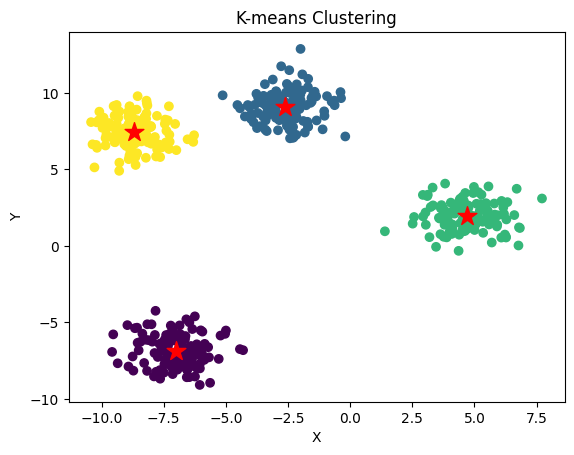

In [113]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
n_samples = 500
n_clusters = 4
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200)
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

10.ADD THE CLUSTER DATA WITH THE RIMARY DATA SET

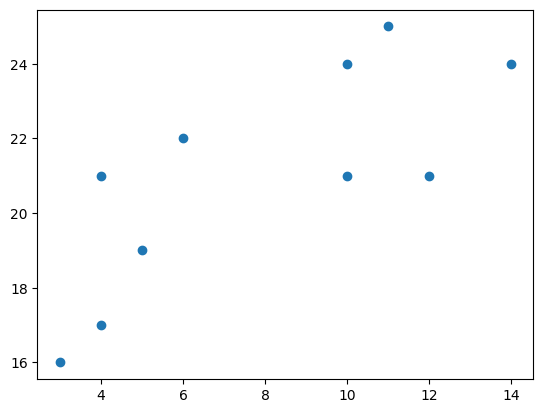

In [114]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

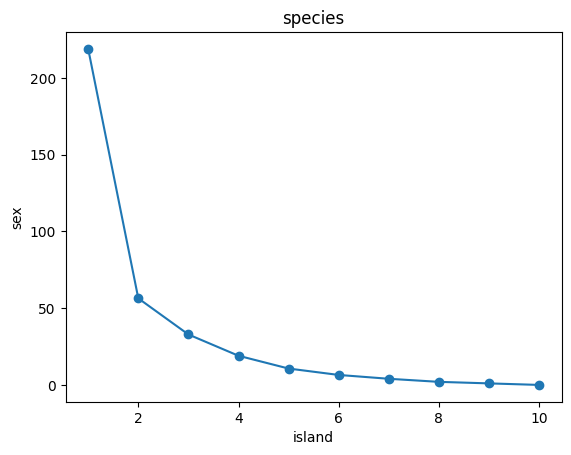

In [115]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('species')
plt.xlabel('island')
plt.ylabel('sex')
plt.show()

11.SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [116]:
x=df.iloc[:,1:].values

In [117]:
x

array([[  2,  41,  56,   5,  30,   2],
       [  2,  44,  43,  10,  32,   1],
       [  2,  50,  49,  19,  11,   1],
       ...,
       [  0, 135,  26,  45,  86,   2],
       [  0,  88,  17,  35,  75,   1],
       [  0, 130,  30,  36,  79,   2]])

In [118]:
y=df.iloc[:,1].values.reshape(-1,1)

In [119]:
y[:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

10.SPLIT THE DATA INTO TRAINING AND TESTING

In [120]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [121]:
x_train

array([[  0,  55,   6,  37,  58,   1],
       [  1,  26,  47,  15,  15,   1],
       [  0, 131,  28,  47,  78,   2],
       ...,
       [  0,  46,  46,  17,  10,   1],
       [  0,  91,  19,  43,  71,   2],
       [  0,  32,  39,   5,   9,   1]])

In [122]:
x_test.shape

(67, 6)

In [123]:
y_train.shape

(267, 1)

In [124]:
y_test.shape

(67, 1)

In [125]:
x

array([[  2,  41,  56,   5,  30,   2],
       [  2,  44,  43,  10,  32,   1],
       [  2,  50,  49,  19,  11,   1],
       ...,
       [  0, 135,  26,  45,  86,   2],
       [  0,  88,  17,  35,  75,   1],
       [  0, 130,  30,  36,  79,   2]])

In [126]:
y

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
    

13.BUILD THE MODEL

In [127]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=4)

In [128]:
xp=pr.fit_transform(x,y)

12.TRAIN THE MODEL

In [129]:
xp

array([[1.0000e+00, 2.0000e+00, 4.1000e+01, ..., 3.6000e+03, 2.4000e+02,
        1.6000e+01],
       [1.0000e+00, 2.0000e+00, 4.4000e+01, ..., 1.0240e+03, 3.2000e+01,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 5.0000e+01, ..., 1.2100e+02, 1.1000e+01,
        1.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 1.3500e+02, ..., 2.9584e+04, 6.8800e+02,
        1.6000e+01],
       [1.0000e+00, 0.0000e+00, 8.8000e+01, ..., 5.6250e+03, 7.5000e+01,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 1.3000e+02, ..., 2.4964e+04, 6.3200e+02,
        1.6000e+01]])

13.TEST THE MODEL

In [130]:
y=x_train

In [131]:
y1=y_train

In [132]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [133]:
mlr.fit(y,y1)

LinearRegression()

In [134]:
ypred=mlr.predict(x_test)

In [135]:
ypred

array([[ 1.00000000e+00],
       [-1.45371357e-15],
       [ 2.00000000e+00],
       [ 1.00000000e+00],
       [ 4.58926182e-16],
       [-1.88270659e-15],
       [-5.69976761e-16],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 2.00000000e+00],
       [ 2.00000000e+00],
       [ 2.32996030e-17],
       [ 1.00000000e+00],
       [-2.37864345e-15],
       [ 1.00000000e+00],
       [ 2.00000000e+00],
       [ 1.00000000e+00],
       [ 2.00000000e+00],
       [-2.90804583e-15],
       [ 3.00208631e-16],
       [ 1.00000000e+00],
       [ 9.21407296e-16],
       [ 1.00000000e+00],
       [ 2.00000000e+00],
       [ 2.00000000e+00],
       [-1.41945662e-15],
       [ 1.41101212e-16],
       [ 1.00000000e+00],
       [-1.00795496e-15],
       [ 1.00000000e+00],
       [ 6.66031691e-16],
       [ 2.00000000e+00],
       [ 1.00000000e+00],
       [ 1.14177830e-15],
       [-2.51202542e-15],
       [ 1.00000000e+00],
       [-3.57460569e-15],
       [-4.6

In [136]:
y_test

array([[1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
       [0],
       [0]])

14.MEASURE THE PERFORMANCE USING METRICS

In [137]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,ypred)
acc

1.0